In [1]:
# 2025
# Supplementary Figure 2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from matplotlib.ticker import MaxNLocator
import warnings




In [3]:
# load NPQ data to use in analysis
df_npq =  pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="NPQ_and_SIMOA_Data")


# Load Target LOD data to use in analysis
df_lod =   pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="Target LOD_NPQ")



In [4]:
# Load target names to be mapped to use in paper
df_target_names = pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="Target Name")

# Build mapping dict for Mapping Target Names to be used in paper
mapping = dict(zip(df_target_names["Target Name on NULISAseq™ CNS Disease Panel "], df_target_names["Target Name used in the paper"]))

# Rename targets in npq data as per target name sheet
df_npq = df_npq.rename(columns=mapping)

# rename  lod data as per target name sheet
df_lod["Target Name on NULISAseq™ CNS Disease Panel "] = df_lod["Target Name on NULISAseq™ CNS Disease Panel "].replace(mapping)

In [20]:
# create functions for analysis

def boxplot_bygroup(npq_data, lod_data, group, markers):

    for marker in markers:
        
        plt.figure(figsize=(12, 8))

        # Retrieve LOD value for the current marker
        lod_value = lod_data.loc[lod_data["Target Name on NULISAseq™ CNS Disease Panel "] == marker, "Target LOD_NPQ"].values
        lod_value = lod_value[0] if len(lod_value) > 0 else None

        # Change order of boxes in the plot presentation
        categories = npq_data[group].unique()
        rev_cat = categories[::-1]

        # Create the boxplot
        color = {"Control": "darkcyan", "MND": "coral"}
        sns.boxplot(x = group, hue = group, y=marker, data=npq_data, showfliers=False, palette=color, order=rev_cat)
        sns.stripplot(x = group, y=marker, data=npq_data, jitter=0.1, color="black", alpha = 0.8, s = 8)

        
        # Add horizontal line for LOD
        plt.axhline(y=lod_value, color="red", linestyle="--", linewidth=2.5, label="LOD")

        # Statistical tests
        group_values = [npq_data[npq_data[group] == grp][marker].dropna() for grp in npq_data[group].unique()]
        stat, p_value = ttest_ind(group_values[0], group_values[1], alternative="two-sided", nan_policy="omit")
        test_result = f"p-value < 0.001" if p_value < 0.001 else f" p-value = {p_value:.3f}"
    
        # Annotate test results
        plt.text(1.0, 1.09,test_result,
        horizontalalignment = "right",
        verticalalignment = "top",
        transform = plt.gca().transAxes,
        fontsize = 40,
        bbox = dict(facecolor = "white", alpha = 0.8, edgecolor = "none", boxstyle = "round, pad = 0.00001"))


  
        plt.xlabel("")
        plt.ylabel(f"{marker} (NPQ)", fontsize=40, labelpad=28)
        plt.xticks(fontsize=40)
        plt.yticks(fontsize=34)
        plt.tight_layout()
        plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.show()



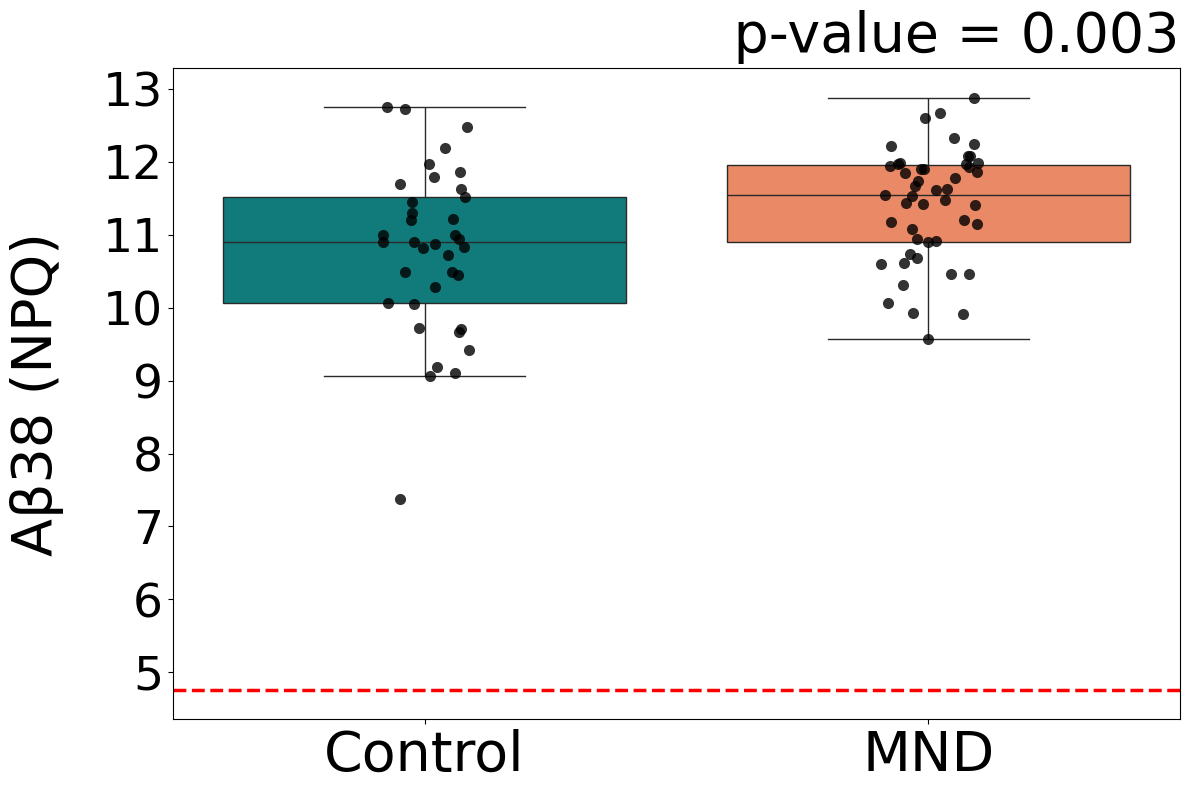

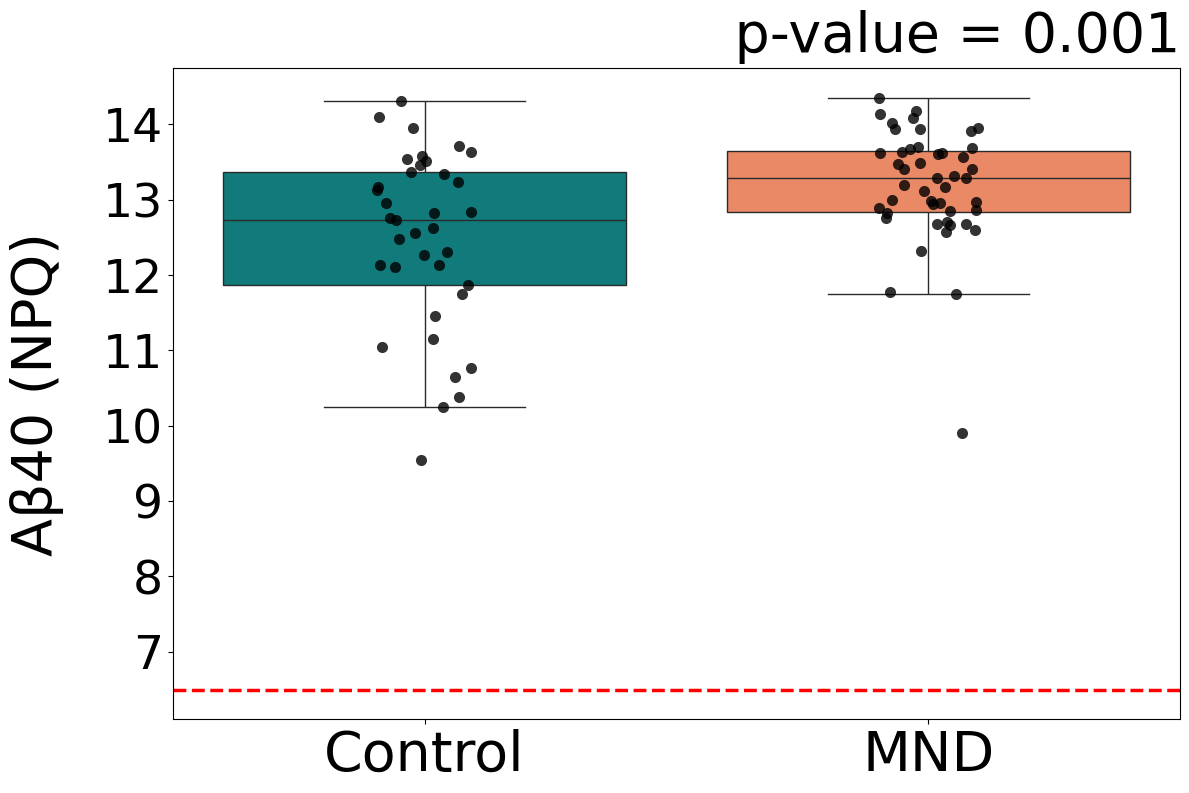

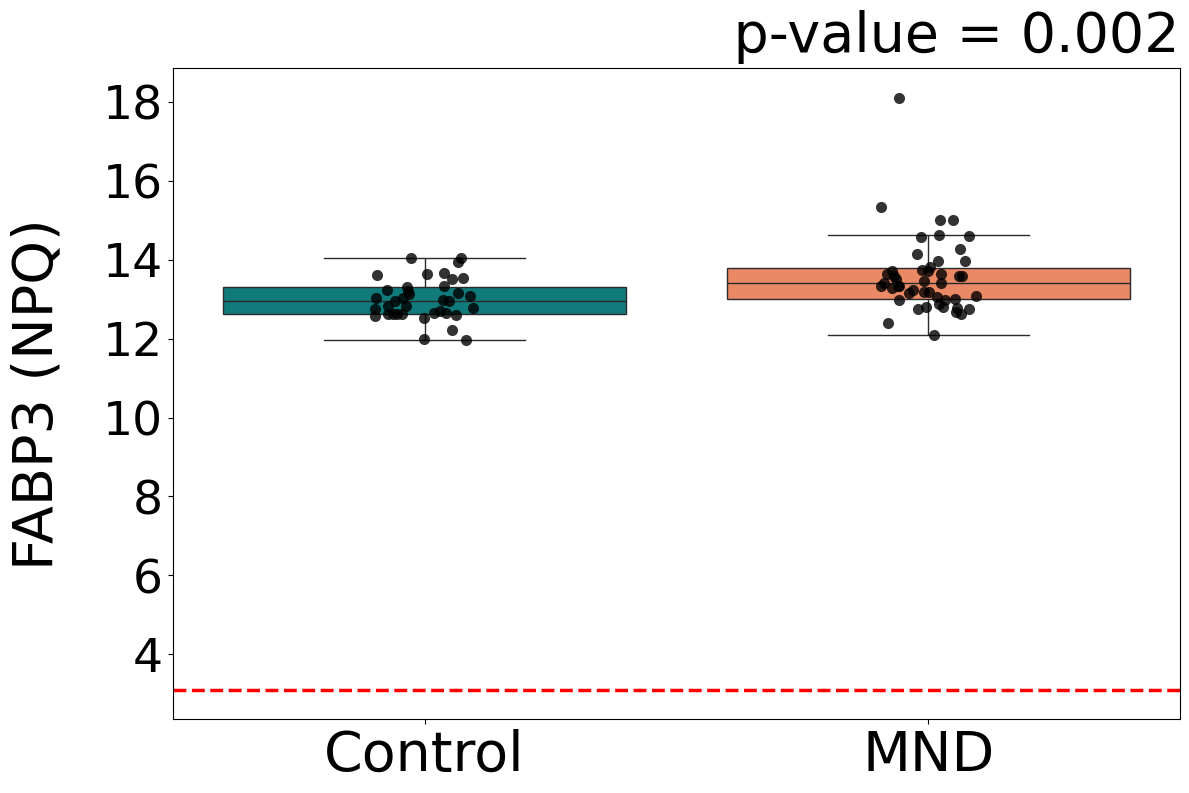

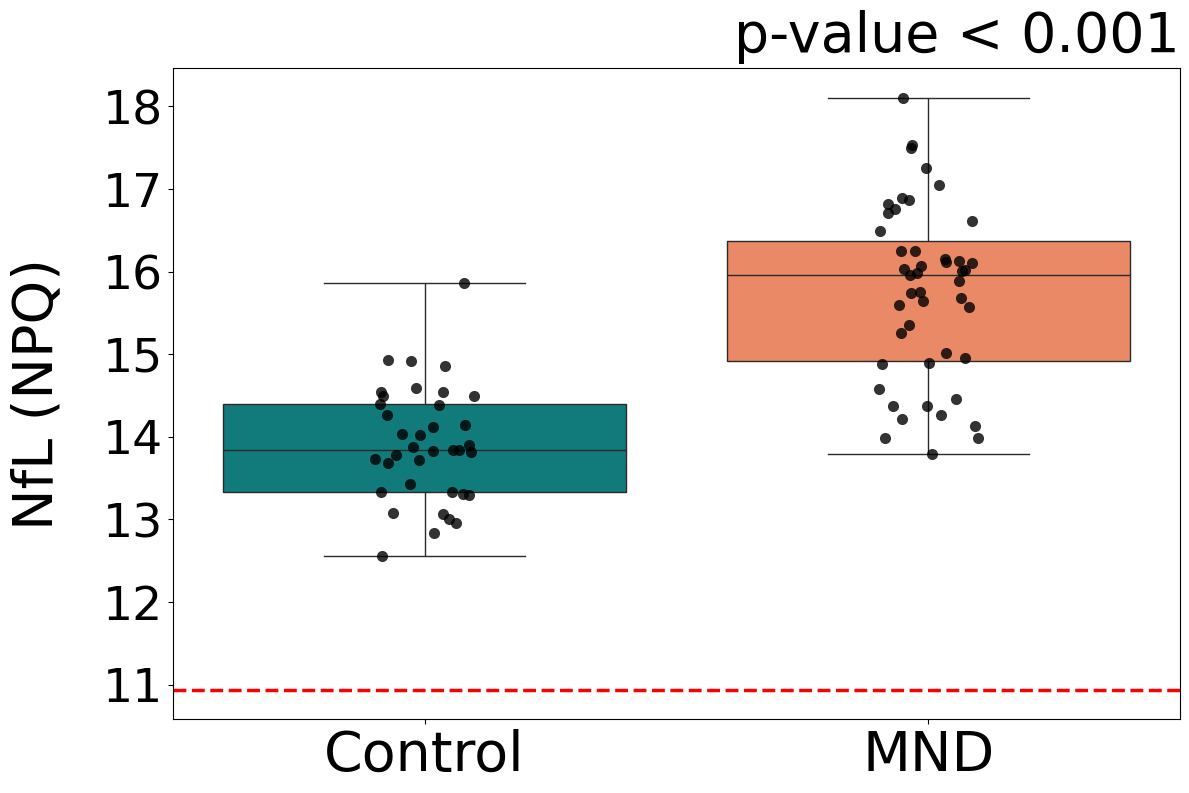

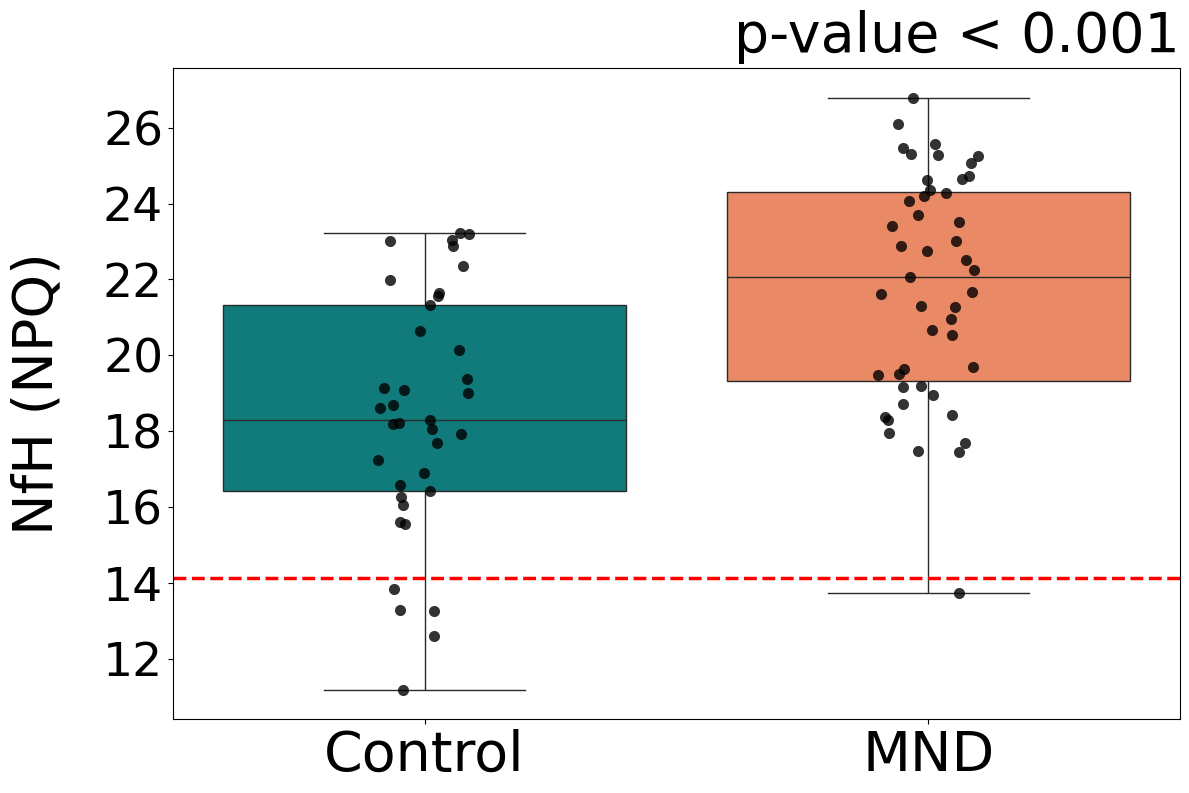

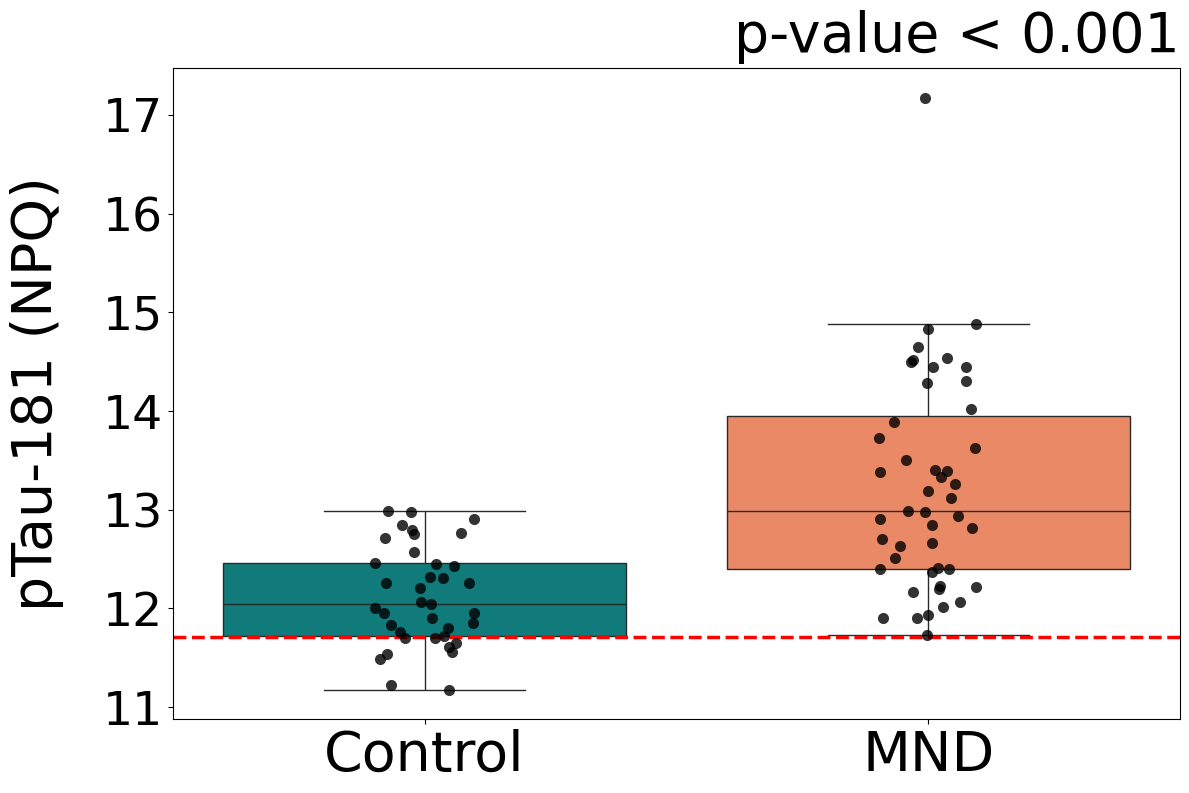

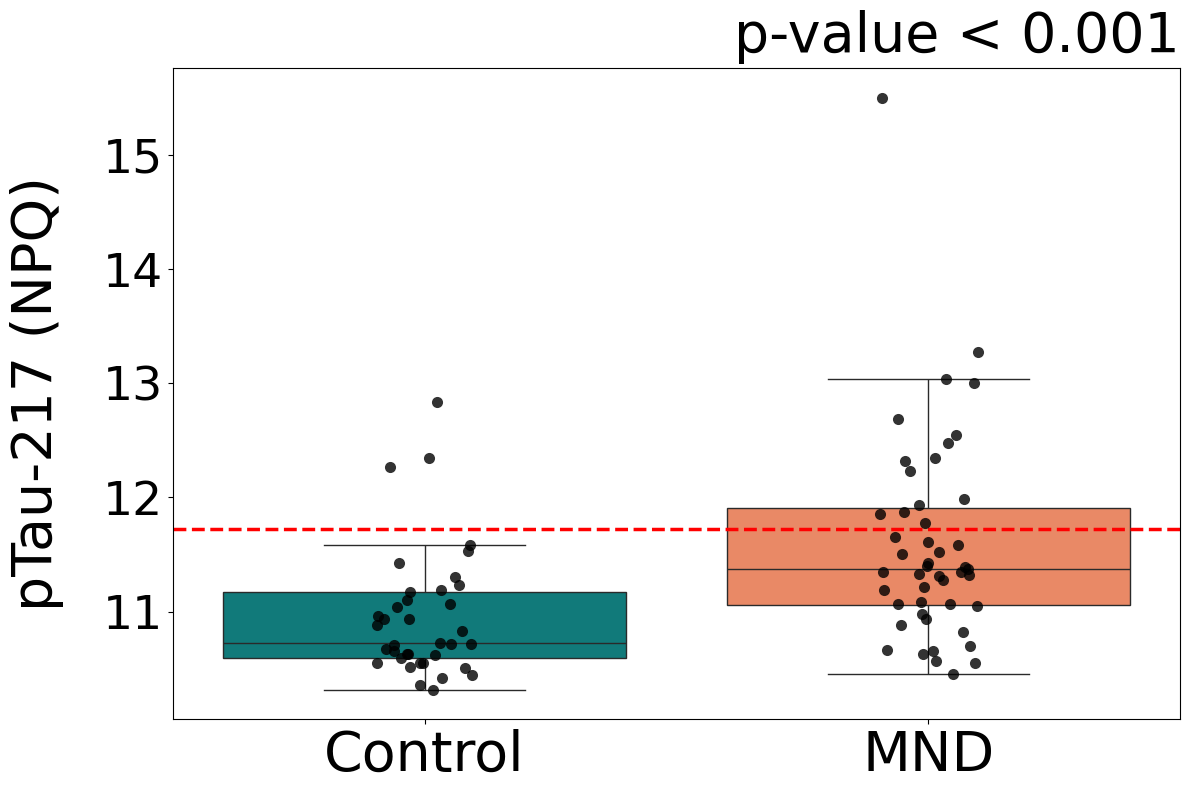

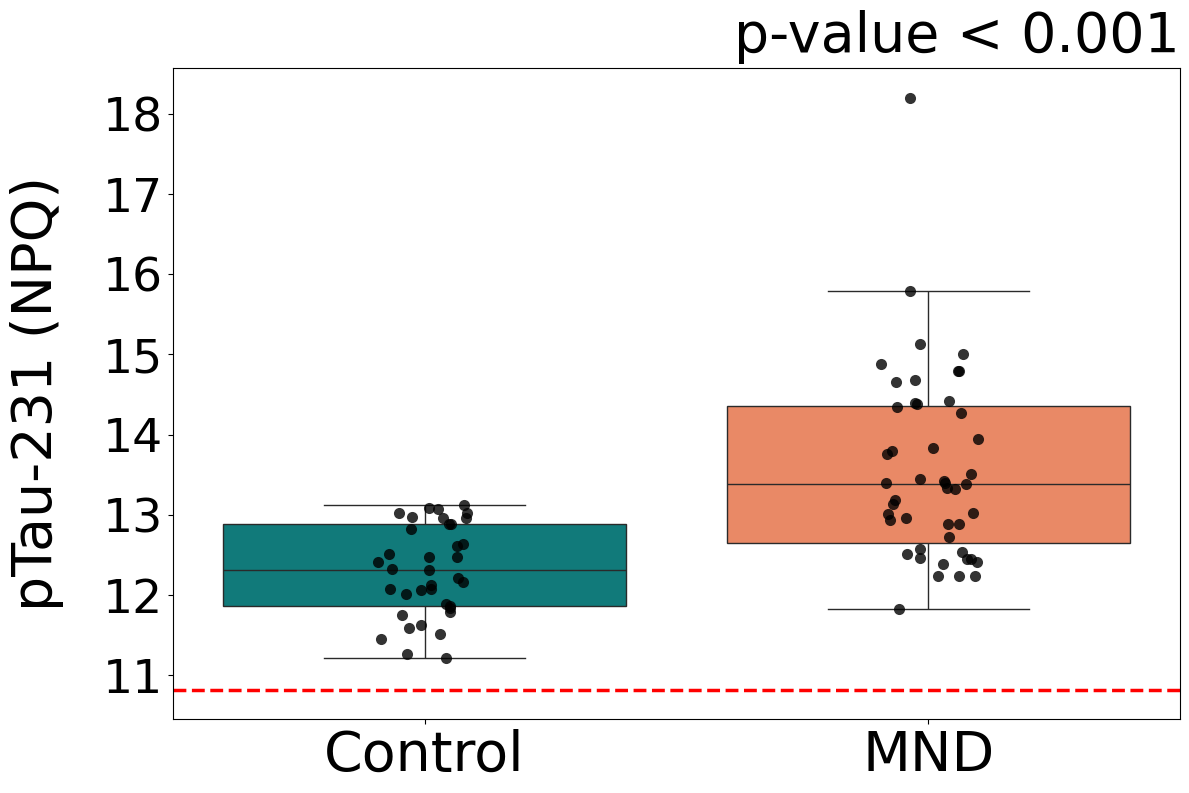

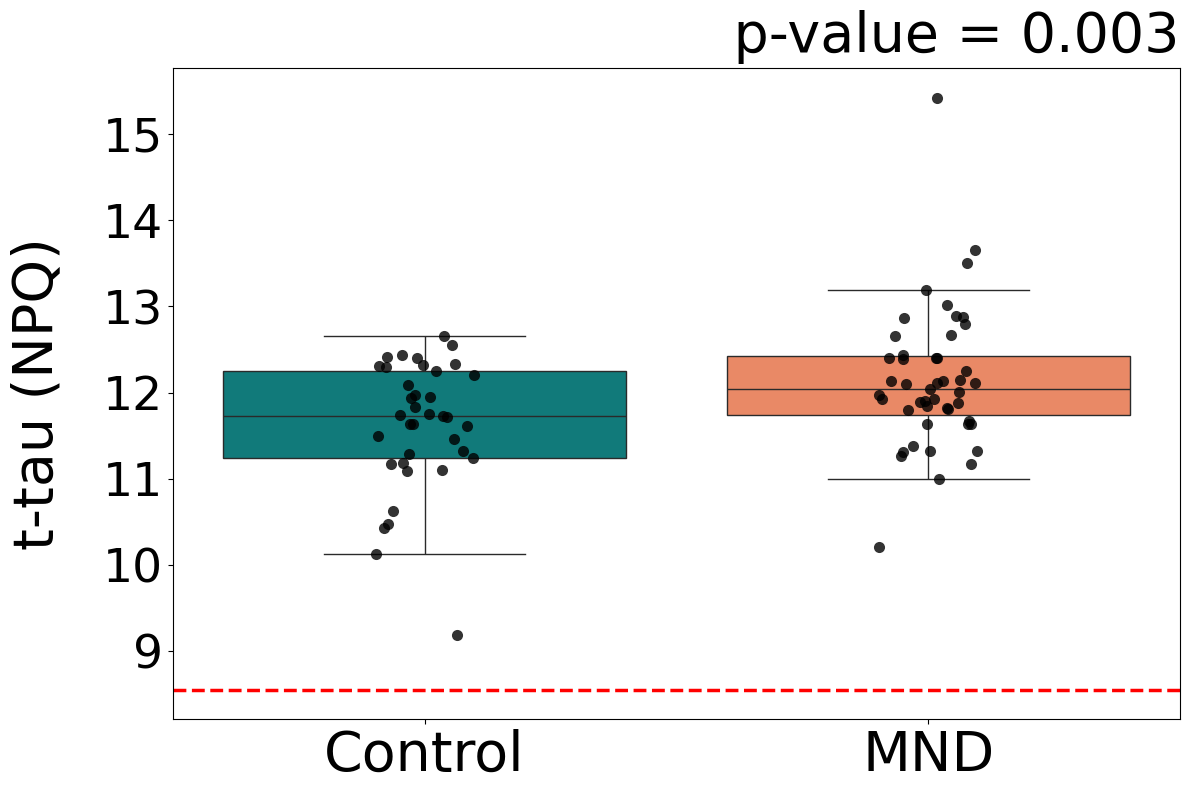

In [22]:
# specify group column to compare - Supplementary Figure 2 plots
group = "Group"

# specify/select markers to plot
markers = [ "Aβ38", "Aβ40",  "FABP3", "NfL", "NfH", "pTau-181", "pTau-217", "pTau-231", "t-tau"]

# Execute boxplot generation
boxplot_bygroup(npq_data=df_npq, lod_data=df_lod, group=group, markers = markers)